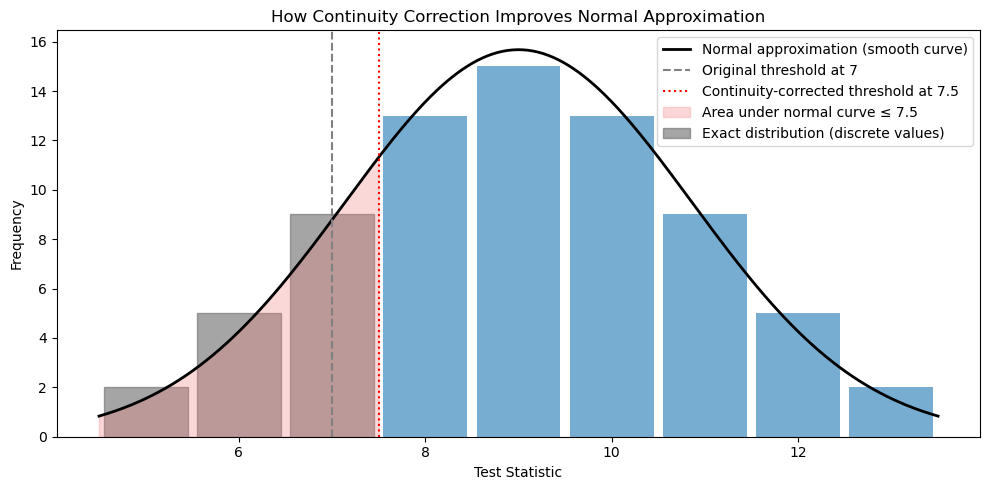

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulated discrete data
x_discrete = np.arange(5, 14)
counts = [2, 5, 9, 13, 15, 13, 9, 5, 2]

# Parameters for normal approximation
mu = np.average(x_discrete, weights=counts)
sigma = np.sqrt(np.average((x_discrete - mu)**2, weights=counts))

# Create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot histogram as bars (discrete probability mass)
bars = ax.bar(x_discrete, counts, width=0.9, align='center', alpha=0.6, label="Exact distribution (discrete values)")

# Overlay normal curve
x_vals = np.linspace(4.5, 13.5, 500)
y_vals = norm.pdf(x_vals, loc=mu, scale=sigma)
scale = sum(counts) * 1.0
ax.plot(x_vals, y_vals * scale, color='black', linewidth=2, label="Normal approximation (smooth curve)")

# Thresholds: discrete vs. continuity corrected
ax.axvline(7, color='gray', linestyle='--', label="Original threshold at 7")
ax.axvline(7.5, color='red', linestyle=':', label="Continuity-corrected threshold at 7.5")

# Shading: discrete bars at or below 7.5
for bar in bars:
    if bar.get_x() + bar.get_width() <= 7.5:
        bar.set_color("dimgray")

# Shading: normal curve area ≤ 7.5
x_fill = np.linspace(4.5, 7.5, 200)
y_fill = norm.pdf(x_fill, loc=mu, scale=sigma) * scale
ax.fill_between(x_fill, y_fill, color="lightcoral", alpha=0.3, label="Area under normal curve ≤ 7.5")

# Final touches
ax.set_title("How Continuity Correction Improves Normal Approximation")
ax.set_xlabel("Test Statistic")
ax.set_ylabel("Frequency")
ax.legend()
plt.tight_layout()
plt.show()


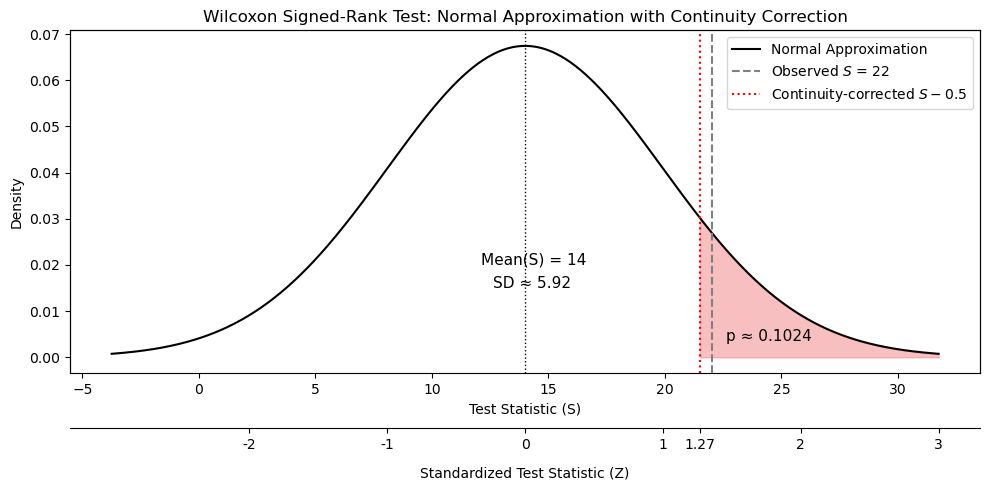

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the Wilcoxon Signed-Rank Test example
n = 7
S_obs = 22
mean_S = n * (n + 1) / 4
sd_S = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)

# Apply continuity correction
S_corr = S_obs - 0.5
Z = (S_corr - mean_S) / sd_S
p_val = 1 - norm.cdf(Z)

# X and Y for the normal distribution curve
x_vals = np.linspace(mean_S - 3*sd_S, mean_S + 3*sd_S, 500)
y_vals = norm.pdf(x_vals, loc=mean_S, scale=sd_S)

# Create plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_vals, y_vals, label="Normal Approximation", color='black')

# Vertical lines
ax.axvline(mean_S, color='black', linestyle=':', linewidth=1)
ax.axvline(S_obs, color='gray', linestyle='--', label=f"Observed $S$ = {S_obs}")
ax.axvline(S_corr, color='red', linestyle=':', label="Continuity-corrected $S - 0.5$")

# Shading for one-tailed p-value area
x_fill = np.linspace(S_corr, mean_S + 3*sd_S, 200)
ax.fill_between(x_fill, norm.pdf(x_fill, loc=mean_S, scale=sd_S), color='lightcoral', alpha=0.5)

# Annotated text
ax.text(mean_S - 1.9, 0.02, "Mean(S) = 14", fontsize=11)
ax.text(mean_S - 1.4, 0.015, "SD ≈ 5.92", fontsize=11)
#ax.text(S_obs - 0.7, 0.01, "S = 22", fontsize=11)
#ax.text(S_obs + 0.6, 0.012, f"Z = {Z:.2f}", fontsize=11)
ax.text(S_obs + 0.6, 0.0035, f"p ≈ {p_val:.4f}", fontsize=11)

# Twin axis for Z-scores (beneath x-axis)
ax_z = ax.twiny()
z_ticks = np.array([-2, -1, 0, 1, 2, 3])
z_vals = mean_S + z_ticks * sd_S
ax_z.set_xlim(ax.get_xlim())
ax_z.set_xticks(np.append(z_vals, S_corr))
ax_z.set_xticklabels([*map(str, z_ticks), f"{Z:.2f}"])
ax_z.xaxis.set_ticks_position('bottom')
ax_z.xaxis.set_label_position('bottom')
ax_z.spines['bottom'].set_position(('outward', 40))
ax_z.set_xlabel("Standardized Test Statistic (Z)", labelpad=10)

# Final formatting
ax.set_title("Wilcoxon Signed-Rank Test: Normal Approximation with Continuity Correction")
ax.set_xlabel("Test Statistic (S)")
ax.set_ylabel("Density")
ax.legend()
plt.tight_layout()
plt.show()
